# Diabetes Prediction

According to the report of Centers of Disease Control and Prevention about one in seven adults in the United States have Diabetes. But by next few years this rate can move higher. With this in mind today, In this article, I will show you how you can use machine learning to Predict Diabetes using Python.

*Importing Libraries*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

*Data Reading*

In [2]:
data = pd.read_csv("/content/diabetes.csv")

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
data.shape

(768, 9)

The diabetes data set consists of 768 data points, with 9 features each

In [8]:
print("Total Rows in my Dataset--->",data.shape[0])
print("Total Columns  in my Dataset--->",data.shape[1])

Total Rows in my Dataset---> 768
Total Columns  in my Dataset---> 9


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Grouping Outcomes

In [16]:
print(data.groupby("Outcome").size())

Outcome
0    500
1    268
dtype: int64


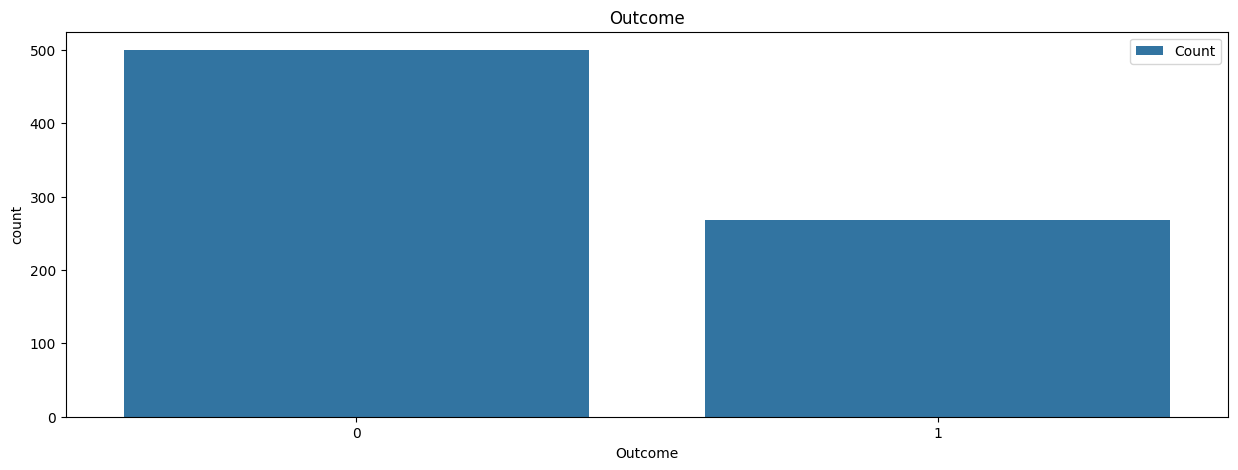

In [27]:
plt.figure(figsize=(15,5))
sns.countplot(data=data,x="Outcome",label="Count")
plt.title("Outcome")
plt.legend()
plt.show()

**We can see that predict of No Diabetes is "500" & Diabetes is nearly "268"**

*Dividing Dataset into train & test split*

In [31]:
x=data.drop(columns=["Outcome"],axis=1)
y=data["Outcome"]

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=5)

Applying Algorithm of Machine Learning

* The k-Nearest Neighbors algorithm is arguably the simplest machine learning algorithm.
* Building the model consists only of storing the training data set. To make a prediction for a new point in the dataset, the algorithm finds the closest data points in the training data set — its “nearest neighbors.”

In [34]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy=[]
test_accuracy=[]
neighbors_setting = range(1,11)
for neighbors in neighbors_setting:
  KNN=KNeighborsClassifier(n_neighbors=neighbors)
  KNN.fit(X_train,y_train)
  training_accuracy.append(KNN.score(X_train,y_train))
  test_accuracy.append(KNN.score(X_test,y_test))

In [36]:
print(training_accuracy)
print(test_accuracy)

[1.0, 0.85, 0.8260869565217391, 0.7978260869565217, 0.7869565217391304, 0.7695652173913043, 0.7543478260869565, 0.7608695652173914, 0.7782608695652173, 0.7782608695652173]
[0.6461038961038961, 0.7402597402597403, 0.7142857142857143, 0.7305194805194806, 0.724025974025974, 0.7402597402597403, 0.7207792207792207, 0.737012987012987, 0.7435064935064936, 0.7272727272727273]


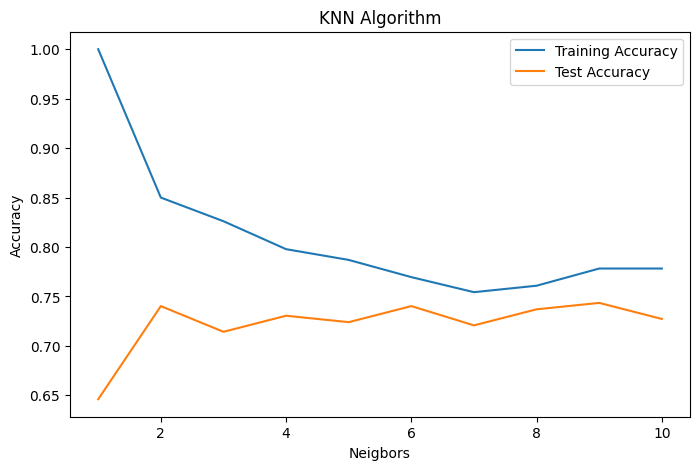

In [45]:
plt.figure(figsize=(8,5))
sns.lineplot(x=neighbors_setting,y=training_accuracy,label="Training Accuracy")
sns.lineplot(x=neighbors_setting,y=test_accuracy,label="Test Accuracy")
plt.xlabel("Neigbors")
plt.ylabel("Accuracy")
plt.title("KNN Algorithm")
plt.legend()
plt.show()


Let's Check the accuracy score

In [51]:
KNN = KNeighborsClassifier(n_neighbors=9)
KNN.fit(X_train,y_train)
KNN.score(X_test,y_test)
print('Accuracy of K-NN classifier on training set: {:.2F}'.format(KNN.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2F}'.format(KNN.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.78
Accuracy of K-NN classifier on test set: 0.74


Implment a DTs Algorithm

In [53]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)
DT.score(X_test,y_test)
print('Accuracy of DTs classifier on training set: {:.2F}'.format(DT.score(X_train, y_train)))
print('Accuracy of DTs  classifier on test set: {:.2F}'.format(DT.score(X_test, y_test)))

Accuracy of DTs classifier on training set: 1.00
Accuracy of DTs  classifier on test set: 0.69


*  The accuracy on the training set with Decision Tree Classifier is 100%, while the test set accuracy is much worse.
*  This is an indicative that the tree is overfitting and not generalizing well to new data. Therefore, we need to apply pre-pruning to the tree.

In [54]:
tree =DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)
tree.score(X_test,y_test)
print('Accuracy of DTs classifier on training set: {:.2F}'.format(tree.score(X_train, y_train)))
print('Accuracy of DTs  classifier on test set: {:.2F}'.format(tree.score(X_test, y_test)))

Accuracy of DTs classifier on training set: 0.82
Accuracy of DTs  classifier on test set: 0.71


**Feature Importance in Daibetes**

* Feature importance shows how important each feature is for the decision a decision tree classifier makes.
* It is a number between 0 and 1 for each feature, where 0 means “not used at all” and 1 means “perfectly predicts the target”.
* The feature importance always sum to 1:

In [75]:
print("Feature importances:\n{}".format(tree.feature_importances_))
print("\n")
print("Feature importances sum:\n{}".format(tree.feature_importances_.sum()))

Feature importances:
[0.05519805 0.49581226 0.08927386 0.         0.         0.14779134
 0.03500016 0.17692433]


Feature importances sum:
0.9999999999999999


*Now lets visualize the feature importance of decision tree to predict diabetes.*

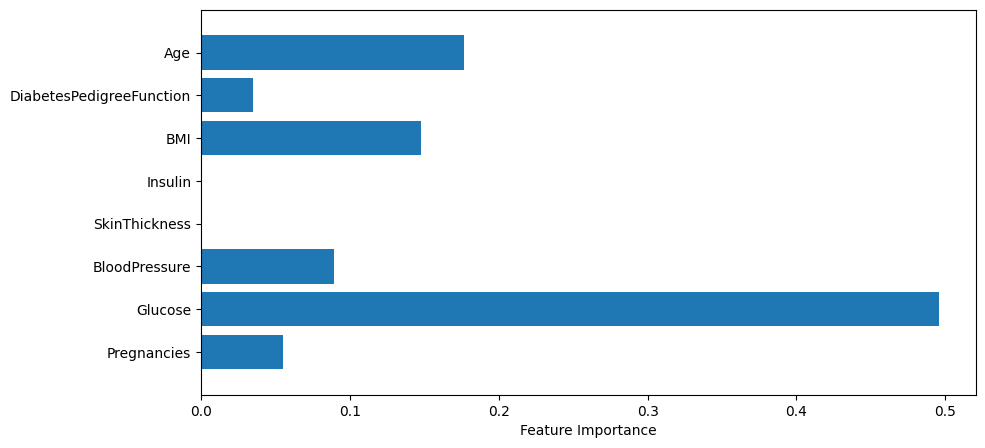

In [62]:
def plot(model):
  plt.figure(figsize=(10,5))
  n_features = 8
  plt.barh(range(n_features),model.feature_importances_,align="center")
  plt.yticks(np.arange(n_features),X_train.columns)
  plt.xlabel("Feature Importance")
  plt.ylim(-1,n_features)
  plt.show()
plot(tree)

**So the Glucose feature is used the most to predict diabetes.**